In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import glob

In [11]:
csv_files = glob.glob('indego-trips-*.csv')

In [12]:
csv_files

['indego-trips-2022-q4.csv',
 'indego-trips-2022-q2.csv',
 'indego-trips-2022-q3.csv',
 'indego-trips-2022-q1.csv',
 'indego-trips-2024-q4.csv',
 'indego-trips-2024-q1.csv',
 'indego-trips-2024-q3.csv',
 'indego-trips-2024-q2.csv',
 'indego-trips-2021-q3.csv',
 'indego-trips-2021-q2.csv',
 'indego-trips-2023-q4.csv',
 'indego-trips-2021-q1.csv',
 'indego-trips-2023-q3-2.csv',
 'indego-trips-2023-q1.csv',
 'indego-trips-2021-q4.csv',
 'indego-trips-2023-q2.csv',
 'indego-trips-2025-q2.csv',
 'indego-trips-2025-q3.csv',
 'indego-trips-2025-q1.csv']

In [13]:
import re 

def extract_year_quarter(filename):
    #Extracts year and quarter from filename to properly order the files above
    match = re.search(r'(\d{4})-q(\d)', filename)
    if match:
        year = int(match.group(1))
        quarter = int(match.group(2))
        return year, quarter
    return None

In [14]:
sorted_files = sorted(csv_files, key=lambda f: extract_year_quarter(f))

In [15]:
sorted_files

['indego-trips-2021-q1.csv',
 'indego-trips-2021-q2.csv',
 'indego-trips-2021-q3.csv',
 'indego-trips-2021-q4.csv',
 'indego-trips-2022-q1.csv',
 'indego-trips-2022-q2.csv',
 'indego-trips-2022-q3.csv',
 'indego-trips-2022-q4.csv',
 'indego-trips-2023-q1.csv',
 'indego-trips-2023-q2.csv',
 'indego-trips-2023-q3-2.csv',
 'indego-trips-2023-q4.csv',
 'indego-trips-2024-q1.csv',
 'indego-trips-2024-q2.csv',
 'indego-trips-2024-q3.csv',
 'indego-trips-2024-q4.csv',
 'indego-trips-2025-q1.csv',
 'indego-trips-2025-q2.csv',
 'indego-trips-2025-q3.csv']

In [16]:
trip_dfs = []
for file in sorted_files:
    trip_df = pd.read_csv(file)
    trip_dfs.append(trip_df)
trip_data = pd.concat(trip_dfs, ignore_index=True)

/var/folders/dk/cx8zjc5x3bs4t_w02hzy6ylc0000gn/T/ipykernel_5521/360258871.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_df = pd.read_csv(file)
/var/folders/dk/cx8zjc5x3bs4t_w02hzy6ylc0000gn/T/ipykernel_5521/360258871.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_df = pd.read_csv(file)
/var/folders/dk/cx8zjc5x3bs4t_w02hzy6ylc0000gn/T/ipykernel_5521/360258871.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_df = pd.read_csv(file)
/var/folders/dk/cx8zjc5x3bs4t_w02hzy6ylc0000gn/T/ipykernel_5521/360258871.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_df = pd.read_csv(file)
/var/folders/dk/cx8zjc5x3bs4t_w02hzy6ylc0000gn/T/ipykernel_5521/360258871.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import 

In [17]:
trip_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,365184634,15,1/1/2021 0:05,1/1/2021 0:20,3125,39.943909,-75.167351,3157,39.925449,-75.159538,14542,30,One Way,Indego30,standard
1,365184633,14,1/1/2021 0:06,1/1/2021 0:20,3022,39.954720,-75.183228,3010,39.947109,-75.166183,5294,30,One Way,Indego30,standard
2,365184632,33,1/1/2021 0:07,1/1/2021 0:40,3066,39.945610,-75.173477,3201,39.955231,-75.166199,14586,30,One Way,Indego30,standard
3,365184631,9,1/1/2021 0:13,1/1/2021 0:22,3045,39.947922,-75.162369,3034,39.933151,-75.162483,14683,30,One Way,Indego30,standard
4,365184630,13,1/1/2021 0:37,1/1/2021 0:50,3052,39.947319,-75.156952,3040,39.962891,-75.166061,3330,30,One Way,Indego30,standard


In [18]:
trip_data.tail()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
5251662,1251852860,5,9/30/2025 23:57,10/1/2025 0:02,3201,39.955231,-75.166199,3201,39.955231,-75.166199,29066,1,Round Trip,Walk-up,electric
5251663,1251856277,6,9/30/2025 23:58,10/1/2025 0:04,3363,39.946548,-75.162628,3063,39.946331,-75.169800,25420,30,One Way,Indego30,electric
5251664,1251855721,5,9/30/2025 23:58,10/1/2025 0:03,3006,39.952202,-75.203110,3024,39.948219,-75.209084,23022,365,One Way,Indego365,electric
5251665,1251856817,8,9/30/2025 23:58,10/1/2025 0:06,3006,39.952202,-75.203110,3381,39.948448,-75.218071,5373,30,One Way,Indego30,standard
5251666,1251856818,9,9/30/2025 23:58,10/1/2025 0:07,3049,39.945091,-75.142502,3063,39.946331,-75.169800,31307,365,One Way,Indego365,electric


In [19]:
trip_data.shape

(5251667, 15)

In [20]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251667 entries, 0 to 5251666
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              int64  
 1   duration             int64  
 2   start_time           object 
 3   end_time             object 
 4   start_station        int64  
 5   start_lat            float64
 6   start_lon            float64
 7   end_station          int64  
 8   end_lat              float64
 9   end_lon              float64
 10  bike_id              object 
 11  plan_duration        int64  
 12  trip_route_category  object 
 13  passholder_type      object 
 14  bike_type            object 
dtypes: float64(4), int64(5), object(6)
memory usage: 601.0+ MB


In [21]:
trip_data.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,5.251667e+06,5.251667e+06,5.251667e+06,5.251459e+06,5.251459e+06,5.251667e+06,5.175571e+06,5.175571e+06,5.251667e+06
mean,7.759480e+08,1.705160e+01,3.143043e+03,3.995210e+01,-7.516945e+01,3.141856e+03,3.995198e+01,-7.516916e+01,1.223882e+02
std,2.924943e+08,4.919677e+01,1.096084e+02,1.416435e-02,1.759160e-02,1.104164e+02,1.426203e-02,1.761389e-02,1.525636e+02
min,3.651846e+08,1.000000e+00,3.000000e+03,3.900773e+01,-7.524522e+01,3.000000e+03,3.900773e+01,-7.524522e+01,1.000000e+00
25%,4.918608e+08,6.000000e+00,3.047000e+03,3.994517e+01,-7.517971e+01,3.046000e+03,3.994517e+01,-7.517971e+01,3.000000e+01
50%,7.419450e+08,1.000000e+01,3.116000e+03,3.995134e+01,-7.516822e+01,3.115000e+03,3.995134e+01,-7.516783e+01,3.000000e+01
75%,1.054362e+09,1.700000e+01,3.212000e+03,3.995924e+01,-7.515821e+01,3.212000e+03,3.995924e+01,-7.515777e+01,3.650000e+02
max,1.254494e+09,1.440000e+03,3.441000e+03,4.002826e+01,-7.510121e+01,3.441000e+03,4.002826e+01,-7.510121e+01,3.650000e+02


In [22]:
trip_data.isna().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat                208
start_lon                208
end_station                0
end_lat                76096
end_lon                76096
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type         1597
bike_type                  0
dtype: int64

In [23]:
trip_data['passholder_type'] = trip_data['passholder_type'].fillna('Unknown')

In [24]:
trip_data.isna().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat                208
start_lon                208
end_station                0
end_lat                76096
end_lon                76096
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type            0
bike_type                  0
dtype: int64

In [25]:
duplicates = trip_data.duplicated()

In [26]:
duplicates

0          False
1          False
2          False
3          False
4          False
           ...  
5251662    False
5251663    False
5251664    False
5251665    False
5251666    False
Length: 5251667, dtype: bool

In [27]:
trip_data.duplicated().sum()

102048

In [28]:
row_dupes = trip_data[trip_data.duplicated(keep=False)]
row_dupes.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
521643,418016541,9,9/1/2021 0:00,9/1/2021 0:09,3010,39.947109,-75.166183,3248,39.942131,-75.183350,18371,30,One Way,Indego30,electric
521644,418016540,10,9/1/2021 0:05,9/1/2021 0:15,3158,39.925522,-75.169037,3190,39.948921,-75.169907,19503,30,One Way,Indego30,electric
521645,418016539,3,9/1/2021 0:09,9/1/2021 0:12,3009,39.955761,-75.189819,3022,39.954720,-75.183228,14723,30,One Way,Indego30,standard
521646,418016538,12,9/1/2021 0:09,9/1/2021 0:21,3062,39.951969,-75.179428,3053,39.932308,-75.181541,2480,30,One Way,Indego30,standard
521647,418016537,9,9/1/2021 0:09,9/1/2021 0:18,3047,39.950729,-75.149467,3040,39.962891,-75.166061,16950,30,One Way,Indego30,electric


In [29]:
row_dupes.shape

(204096, 15)

In [30]:
dupe_trip_ids = trip_data[trip_data.duplicated(subset="trip_id", keep=False)]
dupe_trip_ids.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
521643,418016541,9,9/1/2021 0:00,9/1/2021 0:09,3010,39.947109,-75.166183,3248,39.942131,-75.183350,18371,30,One Way,Indego30,electric
521644,418016540,10,9/1/2021 0:05,9/1/2021 0:15,3158,39.925522,-75.169037,3190,39.948921,-75.169907,19503,30,One Way,Indego30,electric
521645,418016539,3,9/1/2021 0:09,9/1/2021 0:12,3009,39.955761,-75.189819,3022,39.954720,-75.183228,14723,30,One Way,Indego30,standard
521646,418016538,12,9/1/2021 0:09,9/1/2021 0:21,3062,39.951969,-75.179428,3053,39.932308,-75.181541,2480,30,One Way,Indego30,standard
521647,418016537,9,9/1/2021 0:09,9/1/2021 0:18,3047,39.950729,-75.149467,3040,39.962891,-75.166061,16950,30,One Way,Indego30,electric


In [31]:
dupe_trip_ids.shape

(214530, 15)

In [32]:
dupe_groups = dupe_trip_ids.groupby('trip_id')
for col in trip_data.columns:
    num_varied = (dupe_groups[col].nunique() > 1).sum()
    print(f"{col}: {num_varied} duplicate trip_ids with varying {col}")

trip_id: 0 duplicate trip_ids with varying trip_id
duration: 0 duplicate trip_ids with varying duration
start_time: 0 duplicate trip_ids with varying start_time
end_time: 0 duplicate trip_ids with varying end_time
start_station: 0 duplicate trip_ids with varying start_station
start_lat: 955 duplicate trip_ids with varying start_lat
start_lon: 955 duplicate trip_ids with varying start_lon
end_station: 0 duplicate trip_ids with varying end_station
end_lat: 928 duplicate trip_ids with varying end_lat
end_lon: 928 duplicate trip_ids with varying end_lon
bike_id: 3441 duplicate trip_ids with varying bike_id
plan_duration: 0 duplicate trip_ids with varying plan_duration
trip_route_category: 0 duplicate trip_ids with varying trip_route_category
passholder_type: 0 duplicate trip_ids with varying passholder_type
bike_type: 0 duplicate trip_ids with varying bike_type


In [33]:
trip_data = trip_data.drop_duplicates(subset="trip_id", keep="first")

In [34]:
trip_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,365184634,15,1/1/2021 0:05,1/1/2021 0:20,3125,39.943909,-75.167351,3157,39.925449,-75.159538,14542,30,One Way,Indego30,standard
1,365184633,14,1/1/2021 0:06,1/1/2021 0:20,3022,39.954720,-75.183228,3010,39.947109,-75.166183,5294,30,One Way,Indego30,standard
2,365184632,33,1/1/2021 0:07,1/1/2021 0:40,3066,39.945610,-75.173477,3201,39.955231,-75.166199,14586,30,One Way,Indego30,standard
3,365184631,9,1/1/2021 0:13,1/1/2021 0:22,3045,39.947922,-75.162369,3034,39.933151,-75.162483,14683,30,One Way,Indego30,standard
4,365184630,13,1/1/2021 0:37,1/1/2021 0:50,3052,39.947319,-75.156952,3040,39.962891,-75.166061,3330,30,One Way,Indego30,standard


In [35]:
trip_data.tail()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
5251662,1251852860,5,9/30/2025 23:57,10/1/2025 0:02,3201,39.955231,-75.166199,3201,39.955231,-75.166199,29066,1,Round Trip,Walk-up,electric
5251663,1251856277,6,9/30/2025 23:58,10/1/2025 0:04,3363,39.946548,-75.162628,3063,39.946331,-75.169800,25420,30,One Way,Indego30,electric
5251664,1251855721,5,9/30/2025 23:58,10/1/2025 0:03,3006,39.952202,-75.203110,3024,39.948219,-75.209084,23022,365,One Way,Indego365,electric
5251665,1251856817,8,9/30/2025 23:58,10/1/2025 0:06,3006,39.952202,-75.203110,3381,39.948448,-75.218071,5373,30,One Way,Indego30,standard
5251666,1251856818,9,9/30/2025 23:58,10/1/2025 0:07,3049,39.945091,-75.142502,3063,39.946331,-75.169800,31307,365,One Way,Indego365,electric


In [36]:
trip_data.shape

(5144402, 15)

In [37]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5144402 entries, 0 to 5251666
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              int64  
 1   duration             int64  
 2   start_time           object 
 3   end_time             object 
 4   start_station        int64  
 5   start_lat            float64
 6   start_lon            float64
 7   end_station          int64  
 8   end_lat              float64
 9   end_lon              float64
 10  bike_id              object 
 11  plan_duration        int64  
 12  trip_route_category  object 
 13  passholder_type      object 
 14  bike_type            object 
dtypes: float64(4), int64(5), object(6)
memory usage: 628.0+ MB


In [38]:
trip_data['start_time'] = pd.to_datetime(trip_data['start_time'])
trip_data['end_time'] = pd.to_datetime(trip_data['end_time'])

trip_data['trip_year'] = trip_data['start_time'].dt.year
trip_data['trip_month'] = trip_data['start_time'].dt.month
trip_data['trip_quarter'] = trip_data['start_time'].dt.quarter
trip_data['trip_year_quarter'] = trip_data['start_time'].dt.to_period('Q')

In [39]:
trip_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_year,trip_month,trip_quarter,trip_year_quarter
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,39.943909,-75.167351,3157,39.925449,-75.159538,14542,30,One Way,Indego30,standard,2021,1,1,2021Q1
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,39.954720,-75.183228,3010,39.947109,-75.166183,5294,30,One Way,Indego30,standard,2021,1,1,2021Q1
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,39.945610,-75.173477,3201,39.955231,-75.166199,14586,30,One Way,Indego30,standard,2021,1,1,2021Q1
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,39.947922,-75.162369,3034,39.933151,-75.162483,14683,30,One Way,Indego30,standard,2021,1,1,2021Q1
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,39.947319,-75.156952,3040,39.962891,-75.166061,3330,30,One Way,Indego30,standard,2021,1,1,2021Q1


In [40]:
trip_data = trip_data[(trip_data['duration'] > 0) & (trip_data['duration'] < 60*24)]

In [41]:
trip_data.shape

(5141894, 19)

In [42]:
trip_data['trip_id'].duplicated().sum()

0

In [43]:
trip_data['calculated_duration'] = (trip_data['end_time'] - trip_data['start_time']).dt.total_seconds() / 60

In [44]:
trip_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_year,trip_month,trip_quarter,trip_year_quarter,calculated_duration
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,39.943909,-75.167351,3157,39.925449,-75.159538,14542,30,One Way,Indego30,standard,2021,1,1,2021Q1,15.0
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,39.954720,-75.183228,3010,39.947109,-75.166183,5294,30,One Way,Indego30,standard,2021,1,1,2021Q1,14.0
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,39.945610,-75.173477,3201,39.955231,-75.166199,14586,30,One Way,Indego30,standard,2021,1,1,2021Q1,33.0
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,39.947922,-75.162369,3034,39.933151,-75.162483,14683,30,One Way,Indego30,standard,2021,1,1,2021Q1,9.0
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,39.947319,-75.156952,3040,39.962891,-75.166061,3330,30,One Way,Indego30,standard,2021,1,1,2021Q1,13.0


In [45]:
trip_data[trip_data['duration'] != trip_data['calculated_duration']]

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_year,trip_month,trip_quarter,trip_year_quarter,calculated_duration
185,365200960,59,2021-01-01 12:24:00,2021-01-01 13:22:00,3201,39.955231,-75.166199,3101,39.942951,-75.159554,14596,30,One Way,Indego30,standard,2021,1,1,2021Q1,58.0
229,365201647,45,2021-01-01 13:15:00,2021-01-01 13:59:00,3212,39.963791,-75.181580,3212,39.963791,-75.181580,14630,30,Round Trip,Indego30,standard,2021,1,1,2021Q1,44.0
238,365201631,26,2021-01-01 13:34:00,2021-01-01 13:59:00,3166,39.972351,-75.134453,3182,39.950809,-75.169533,14519,365,One Way,Indego365,standard,2021,1,1,2021Q1,25.0
413,365247227,6,2021-01-02 06:18:00,2021-01-02 06:23:00,3169,39.953819,-75.142632,3033,39.950050,-75.156723,17642,365,One Way,Indego365,electric,2021,1,1,2021Q1,5.0
449,365249927,11,2021-01-02 08:19:00,2021-01-02 08:29:00,3121,39.974140,-75.180222,3037,39.954239,-75.161377,5376,365,One Way,Indego365,standard,2021,1,1,2021Q1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251210,1251723877,6,2025-09-30 21:03:00,2025-09-30 21:10:00,3375,39.960361,-75.140198,3345,39.961700,-75.146667,23179,30,One Way,Indego30,electric,2025,9,3,2025Q3,7.0
5251301,1251753379,8,2025-09-30 21:26:00,2025-09-30 21:33:00,3059,39.962440,-75.161209,3185,39.951691,-75.158882,11950,30,One Way,Indego30,standard,2025,9,3,2025Q3,7.0
5251354,1251777505,12,2025-09-30 21:42:00,2025-09-30 21:53:00,3261,39.963039,-75.140991,3204,39.964371,-75.165817,5411,1,One Way,Walk-up,standard,2025,9,3,2025Q3,11.0
5251449,1251815366,14,2025-09-30 22:08:00,2025-09-30 22:21:00,3337,39.973179,-75.146118,3166,39.971951,-75.134453,11712,1,One Way,Walk-up,standard,2025,9,3,2025Q3,13.0


In [46]:
trip_data[['duration', 'calculated_duration']].corr()

,duration,calculated_duration
duration,1.000000,0.999971
calculated_duration,0.999971,1.000000


In [47]:
blues = [
    "#0D3B66",  
    "#1D70A2",  
    "#74A9CF",  
    "#A6CEE3",  
    "#D0E3F0"   
]

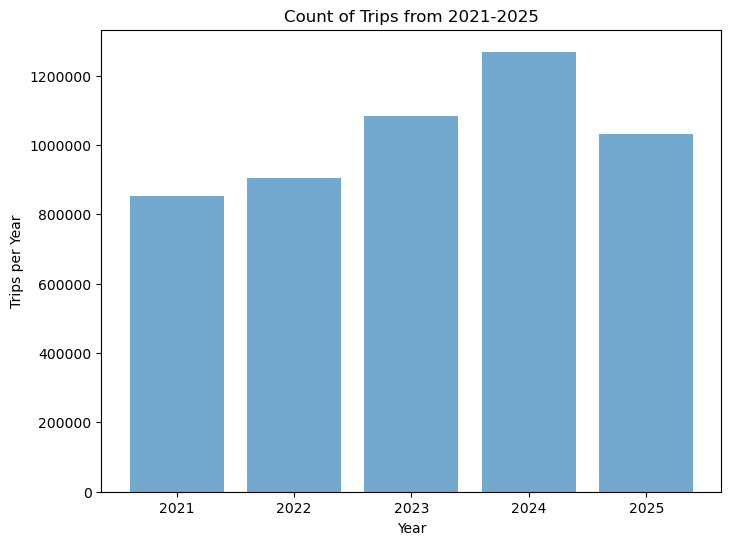

In [48]:
#Trips by Year
trips_grouped_by_year = trip_data.groupby('trip_year')['trip_id'].count().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(trips_grouped_by_year['trip_year'], trips_grouped_by_year['trip_id'], color=blues[2])
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 
plt.xlabel('Year')
plt.ylabel('Trips per Year')
plt.title('Count of Trips from 2021-2025')
plt.savefig("trip_count_by_year.png", dpi=300, bbox_inches="tight")
plt.show()

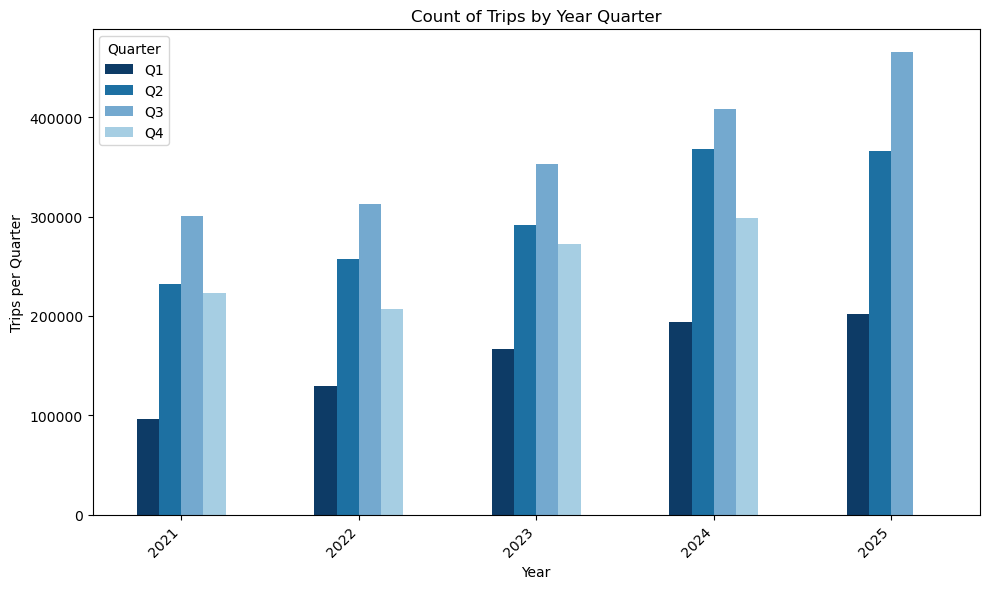

In [49]:
trips_grouped_by_quarter = trip_data.groupby(['trip_year','trip_quarter'])['trip_id'].size().reset_index(name='Count')
trips_by_quarter_pivot = trips_grouped_by_quarter.pivot_table(index='trip_year', columns='trip_quarter', values='Count')

ax = trips_by_quarter_pivot.plot(kind='bar', figsize=(10, 6), color=blues[:4])

quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
ax.legend([quarter_labels[q] for q in trips_by_quarter_pivot.columns], title='Quarter')

plt.title('Count of Trips by Year Quarter')
plt.xlabel('Year')
plt.ylabel('Trips per Quarter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("trip_count_by_year_quarter.png", dpi=300, bbox_inches="tight")
plt.show()

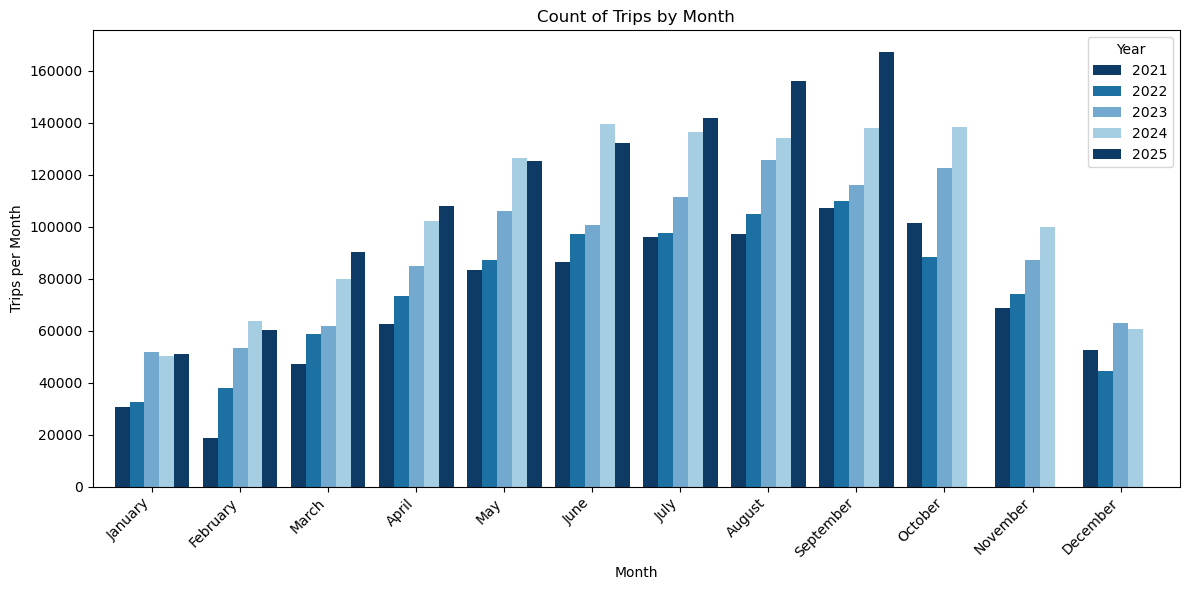

In [50]:
import calendar

trips_grouped_by_month = trip_data.groupby(['trip_year','trip_month'])['trip_id'].size().reset_index(name='Count')
trips_by_month_pivot = trips_grouped_by_month.pivot_table(index='trip_month', columns='trip_year', values='Count')

trips_by_month_pivot = trips_by_month_pivot.sort_index()

trips_by_month_pivot.index = [calendar.month_name[m] for m in trips_by_month_pivot.index]

ax = trips_by_month_pivot.plot(kind='bar', figsize=(12, 6), color=blues[:4], width=0.85)

plt.title('Count of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Trips per Month')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Year')
plt.tight_layout()
plt.savefig("trip_count_by_month.png", dpi=300, bbox_inches="tight")
plt.show()

In [51]:
trips_q = trip_data.groupby(['trip_year', 'trip_quarter'])['trip_id'].size().reset_index(name='Count')

In [52]:
trips_q

,trip_year,trip_quarter,Count
0,2021,1,96224
1,2021,2,232066
2,2021,3,300298
3,2021,4,222884
4,2022,1,129013
5,2022,2,257226
6,2022,3,312272
7,2022,4,206920
8,2023,1,166814
9,2023,2,291758


In [53]:
trips_q['qoq_growth'] = trips_q.groupby('trip_year')['Count'].pct_change() * 100

In [54]:
trips_q

,trip_year,trip_quarter,Count,qoq_growth
0,2021,1,96224,NaN
1,2021,2,232066,141.172680
2,2021,3,300298,29.401980
3,2021,4,222884,-25.779059
4,2022,1,129013,NaN
5,2022,2,257226,99.379907
6,2022,3,312272,21.399858
7,2022,4,206920,-33.737255
8,2023,1,166814,NaN
9,2023,2,291758,74.900188


<Figure size 1000x600 with 0 Axes>

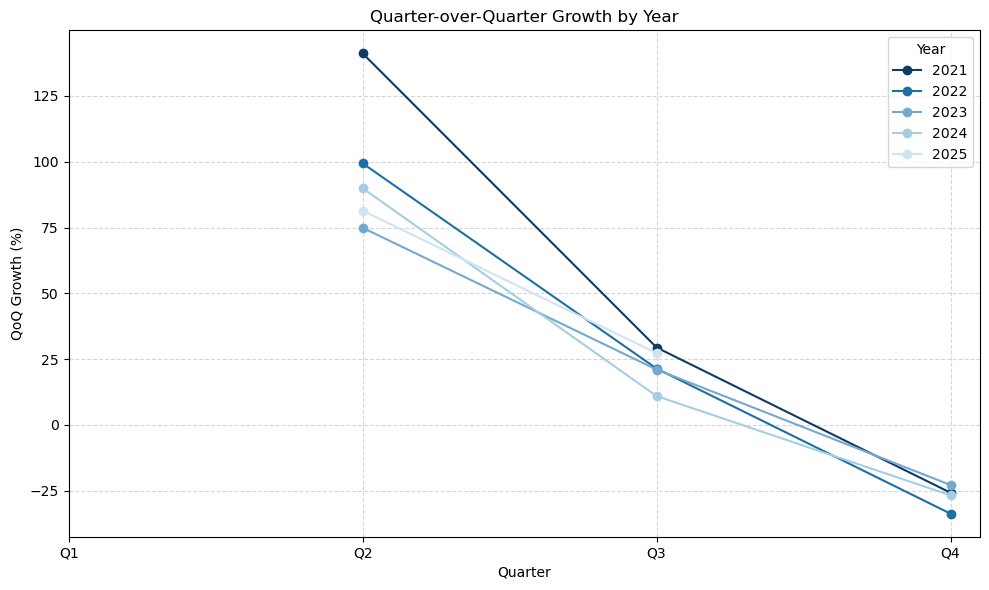

In [55]:
qoq_pivot = trips_q.pivot_table(
    index='trip_quarter',
    columns='trip_year',
    values='qoq_growth'
).sort_index()

plt.figure(figsize=(10, 6))

ax = qoq_pivot.plot(
    kind='line',
    marker='o',
    figsize=(10, 6),
    color=blues[:qoq_pivot.shape[1]]
)

ax.set_xlabel('Quarter')
ax.set_ylabel('QoQ Growth (%)')
ax.set_title('Quarter-over-Quarter Growth by Year')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.legend(title='Year')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("qoq_trip_growth_by_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [56]:
trip_duration_by_year = trip_data.groupby('trip_year')['duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(trip_duration_by_year['trip_year'], trip_duration_by_year['duration'], color=perpay_blues[3])
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 
plt.xlabel('Year')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Yearly Average Trip Duration from 2021-2025')
plt.savefig("trip_duration_by_year.png", dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'perpay_blues' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
trip_duration_grouped_by_quarter = trip_data.groupby(['trip_year','trip_quarter'])['duration'].mean().reset_index()
trip_duration_by_quarter_pivot = trip_duration_grouped_by_quarter.pivot_table(index='trip_year', columns='trip_quarter', values='duration')

ax = trip_duration_by_quarter_pivot.plot(kind='bar', figsize=(10, 6), color=blues[:4])

quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
ax.legend([quarter_labels[q] for q in trip_duration_by_quarter_pivot.columns], title='Quarter')

plt.title('Average Trip Duration by Year Quarter')
plt.xlabel('Year')
plt.ylabel('Trip Duration per Quarter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("trip_duration_by_year_quarter.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
trip_duration_by_year = trip_data.groupby('trip_year')['duration'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(trip_duration_by_year['trip_year'], trip_duration_by_year['duration'], color= blues[1])
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xlabel('Year')
plt.ylabel('Total Trip Duration (minutes)')
plt.title('Yearly Total Trip Duration from 2021-2025')
plt.savefig("total_trip_duration_by_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
trip_duration_grouped_by_quarter = trip_data.groupby(['trip_year','trip_quarter'])['duration'].sum().reset_index()
trip_duration_by_quarter_pivot = trip_duration_grouped_by_quarter.pivot_table(index='trip_year', columns='trip_quarter', values='duration')

ax = trip_duration_by_quarter_pivot.plot(kind='bar', figsize=(10, 6), color=blues[:4])

quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
ax.legend([quarter_labels[q] for q in trip_duration_by_quarter_pivot.columns], title='Quarter')

plt.title('Quarterly Total Trip Duration by Year')
plt.xlabel('Year')
plt.ylabel('Trip Duration (minutes)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("total_trip_duration_by_year_quarter.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
trip_duration_by_year

In [ ]:
trip_duration_by_year['YoYGrowth'] = trip_duration_by_year['duration'].pct_change() * 100

In [ ]:
trip_duration_by_year

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(trip_duration_by_year['trip_year'], trip_duration_by_year['YoYGrowth'], 
         marker='o', linewidth=3, color=blues[2])
plt.title('Year-over-Year Growth in Total Trip Duration', fontsize=14)
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.savefig("yoy_growth_of_total_trip_duration.png", dpi=300, bbox_inches="tight")
plt.show()